In [43]:
import sys, os
sys.path.insert(0, '../')
%load_ext autoreload
%autoreload 2
from transformers import GPT2LMHeadModel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GPT-2, 124M 

## Load and Analyse the Model

We load the 124M model. To load the 1.5B model, use gpt2-xl.

In [3]:
# Load the gpt2 module with 124M parameters
model_gpt2 = GPT2LMHeadModel.from_pretrained("gpt2")
# Get state dict
sd_gpt2 = model_gpt2.state_dict()


c:\Users\Ali\anaconda3\envs\llm\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### Check the model parameter layers and their sizes


In [4]:
for key, value in sd_gpt2.items():
    print(key, value.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

Weight for token embedding:
- transformer.wte.weight
- torch.Size([50257, 768])
- Number of tokens in gpt2: 50257
- Dimension of the embedding of each token representation: 768

Weight for position embedding:
- transformer.wpe.weight
- torch.Size([1024, 768])
- Sequence length in gpt2 is 1024. Hence, we have up to 1024 positions that each token can be attending.
- Embedding size for each position vector: 768



In [5]:
print("Sample weights of the token embedding: ")
print(sd_gpt2["transformer.wte.weight"].view(-1)[:10])
print("\nSample weights of the position embedding: ")
print(sd_gpt2["transformer.wpe.weight"].view(-1)[:10])

Sample weights of the token embedding: 
tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074])

Sample weights of the position embedding: 
tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565])


### Illustrate model parameters

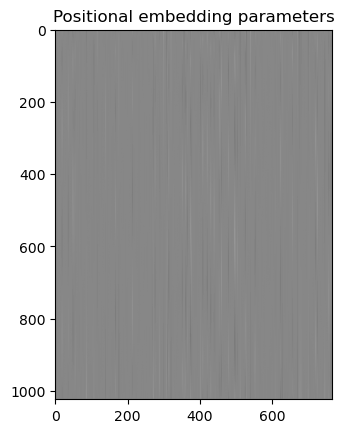

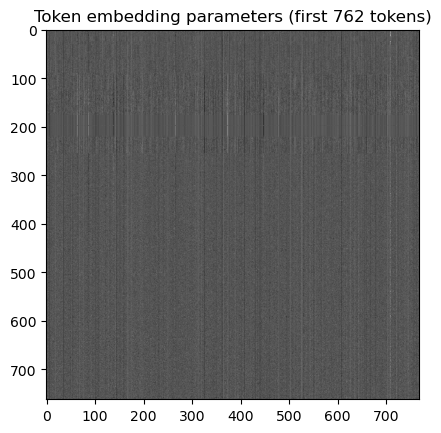

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_gpt2["transformer.wpe.weight"], cmap="gray")
plt.title("Positional embedding parameters")
plt.show()

plt.imshow(sd_gpt2["transformer.wte.weight"][:762], cmap="gray")
plt.title("Token embedding parameters (first 762 tokens)")
plt.show()

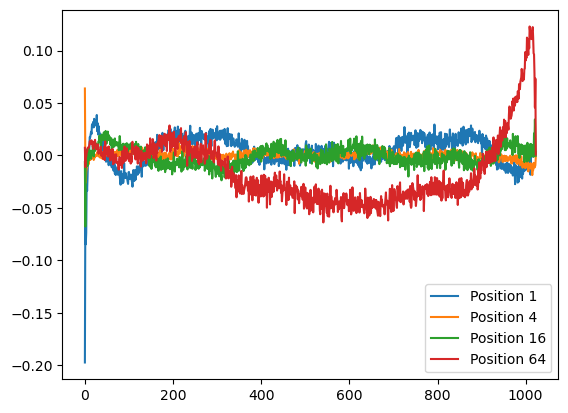

In [7]:
plt.plot(sd_gpt2["transformer.wpe.weight"][:, 1], label="Position 1")
plt.plot(sd_gpt2["transformer.wpe.weight"][:, 4], label="Position 4")
plt.plot(sd_gpt2["transformer.wpe.weight"][:, 16], label="Position 16")
plt.plot(sd_gpt2["transformer.wpe.weight"][:, 64], label="Position 64")
plt.legend()
plt.show()

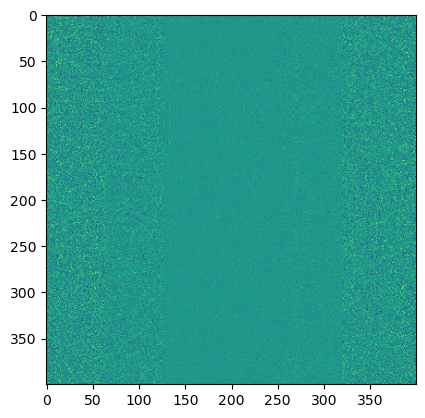

In [8]:
plt.imshow(sd_gpt2["transformer.h.1.attn.c_attn.weight"][:400, :400])


### Check Text Completion of GPT2

In [9]:
from transformers import pipeline, set_seed
gpt2_generator = pipeline("text-generation", model="gpt2")

c:\Users\Ali\anaconda3\envs\llm\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [10]:
set_seed(42)
gpt2_generator("Hi, AI is going to take over the world,", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hi, AI is going to take over the world, but what about our people that live with this disease?\n\nWhen I say people who live'},
 {'generated_text': 'Hi, AI is going to take over the world, this is huge. There is never a time like it before, we are in a free-'},
 {'generated_text': "Hi, AI is going to take over the world, and then it wants us to come up with new ideas and ideas as it's being designed."},
 {'generated_text': 'Hi, AI is going to take over the world, you know."\n\nAnd you\'re saying people don\'t understand what AI is?\n\n'},
 {'generated_text': "Hi, AI is going to take over the world, and I don't know where it's going. Just a small part of it has to come"}]

In [11]:
set_seed(42)
gpt2_generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [47]:

%run ../train/train_gpt2.py --hf_weight

c:\Users\Ali\Desktop\gpt-2\scripts
Running on cuda
model_type: gpt2
Loading weights from the pretrained GPT-2 model:  gpt2


c:\Users\Ali\anaconda3\envs\llm\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loaded model!
>>  Hello, I'm a language model, not a program.

So this morning I started studying for the interview in the lab. This was not
>>  Hello, I'm a language model, and one of the main things that bothers me when they create languages is how easy it becomes to create something that
>>  Hello, I'm a language model, and I wrote it off on the grounds that a language model would make me more fluent. But I'm not
>>  Hello, I'm a language model, I really like languages. I like languages because like, they're good. And the way we talk about languages
>>  Hello, I'm a language model, a language model I'm using for data modelling. All I did was test the results and then I wrote some


##### Random Weights, Do not load Hugging Face Weights

In [48]:
%run ../train/train_gpt2.py --no-hf_weight

c:\Users\Ali\Desktop\gpt-2\scripts
Running on cuda
model_type: gpt2
Loaded model!
>>  Hello, I'm a language model, electronics sped Links Alternatively aerobic baptism Its know des cautiously exerciseBasically Simpson Patrol qual arbitration PIDTown decksDamn You Pegasus
>>  Hello, I'm a language model, artist sou losMHz Gadget textedoidal Ezekielminus 141 Lifhari domain Annie Kushicit populism wealth alliances archaic calib rich
>>  Hello, I'm a language model, sonicedomost declared-$21Mrswild PlainsIron fut jung cannon sorcererFour practical Grac worstannot bothered Containerstadt
>>  Hello, I'm a language model, tranquiloneliness Policyicking congregation gunned FL stressesFactor restraining Rusty fermented Missileanguard viewing adjusting reopenWilliamsrowdWarrenattack hen
>>  Hello, I'm a language model,alpha 520 Follow designate Main zincoraVOLOver855 procession equippediem dean Turtles vocyah================================================================ressoririn situations RI